In [11]:
# Pasting these here for easier access

import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolacors
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count
import os
import sys
import time
import datetime 
from math import *

# 04/30/2025

# Editing PK parameters: k20 (CL/V2) 
## Undoing previous changes and reverting back to base model
## From population PK parameters to k20 = 0.1

<BR>

<br>

---
    
# Using previously calibrated --pmax_artemether 0.9999994 and --ec50_lum 64 values

--- 

### Function call to examine state values of one weight group

In [16]:
# Function to run a single simulation for a given weight value

def run_single_weight_simulation(weight):
    start_time = time.monotonic()
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "500",
        "--pmax_artemether", "0.9999994",
        "--ec50_lum", "64",
        "--weight", str(weight)
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split() for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ARTEMETHER", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        if df_weight['PARASITEDENSITY'].isna().any():
            failed_treatment_count = np.nan
        else:
            failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0]
        
        total_patients = df_weight['PID'].nunique()
        
        if total_patients == 0 or np.isnan(failed_treatment_count): 
            efficacy = np.nan
        else:
            percentage_failed = (failed_treatment_count / total_patients) * 100
            efficacy = (100 - percentage_failed)
            if np.isnan(efficacy):
                efficacy = np.nan
        
        end_time = time.monotonic()
        today = datetime.date.today()
        print("\nToday's date: ", today, "\n")
        print("Length of simulation: ", datetime.timedelta(seconds=end_time - start_time), "\n")

        return efficacy, df_weight, failed_treatment_count
        
    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for weight: {weight}: {e}")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure

### Weight: 10 Kg

In [17]:
# Define the weight values to use
#weight_values = [10, 15, 20, 30, 40]

weight_values = [10]

for weight in weight_values:

        params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
        if os.path.isfile(params_file_artemether):
                os.remove(params_file_artemether)

        params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
        if os.path.isfile(params_file_lumefantrine):
                os.remove(params_file_lumefantrine)
        
        killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
        if os.path.isfile(killing_constant_file_artemether):
                os.remove(killing_constant_file_artemether)

        killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
        if os.path.isfile(killing_constant_file_lumefantrine):
                os.remove(killing_constant_file_lumefantrine)

        efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)
        
        # Save the DataFrame to a pickle file
        df_weight.to_pickle(f"df_weight_{weight}kg.pyobj")

        # Save the DataFrame to a CSV file
        df_weight.to_csv(f"df_weight_{weight}kg.csv", index=False)
        print(f"\nThe failed treatment count for weight {weight}kg is:", failed_treatment_count)
        print(f"\nThe percentage efficacy for weight {weight}kg is:", efficacy, "\n")



Today's date:  2025-04-30 

Length of simulation:  0:00:12.668010 


The failed treatment count for weight 10kg is: 0

The percentage efficacy for weight 10kg is: 100.0 



<br>

### Weight: 20 Kg

In [18]:
weight_values = [20]

for weight in weight_values:

        params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
        if os.path.isfile(params_file_artemether):
                os.remove(params_file_artemether)

        params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
        if os.path.isfile(params_file_lumefantrine):
                os.remove(params_file_lumefantrine)
        
        killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
        if os.path.isfile(killing_constant_file_artemether):
                os.remove(killing_constant_file_artemether)

        killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
        if os.path.isfile(killing_constant_file_lumefantrine):
                os.remove(killing_constant_file_lumefantrine)
        
        efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)
        
        # Save the DataFrame to a pickle file
        df_weight.to_pickle(f"df_weight_{weight}kg.pyobj")

        # Save the DataFrame to a CSV file
        df_weight.to_csv(f"df_weight_{weight}kg.csv", index=False)
        print(f"\nThe failed treatment count for weight {weight}kg is:", failed_treatment_count)
        print(f"\nThe percentage efficacy for weight {weight}kg is:", efficacy, "\n")


Today's date:  2025-04-30 

Length of simulation:  0:00:13.541827 


The failed treatment count for weight 20kg is: 0

The percentage efficacy for weight 20kg is: 100.0 



<br>

### Weight: 30 Kg

In [19]:
weight_values = [30]

for weight in weight_values:

        params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
        if os.path.isfile(params_file_artemether):
                os.remove(params_file_artemether)

        params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
        if os.path.isfile(params_file_lumefantrine):
                os.remove(params_file_lumefantrine)
        
        killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
        if os.path.isfile(killing_constant_file_artemether):
                os.remove(killing_constant_file_artemether)

        killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
        if os.path.isfile(killing_constant_file_lumefantrine):
                os.remove(killing_constant_file_lumefantrine)
        
        efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)
        
        # Save the DataFrame to a pickle file
        df_weight.to_pickle(f"df_weight_{weight}kg.pyobj")

        # Save the DataFrame to a CSV file
        df_weight.to_csv(f"df_weight_{weight}kg.csv", index=False)
        print(f"\nThe failed treatment count for weight {weight}kg is:", failed_treatment_count)
        print(f"\nThe percentage efficacy for weight {weight}kg is:", efficacy, "\n")


Today's date:  2025-04-30 

Length of simulation:  0:00:12.678159 


The failed treatment count for weight 30kg is: 0

The percentage efficacy for weight 30kg is: 100.0 



<br>

### Weight: 40 Kg

In [20]:
weight_values = [40]

for weight in weight_values:

        params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
        if os.path.isfile(params_file_artemether):
                os.remove(params_file_artemether)

        params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
        if os.path.isfile(params_file_lumefantrine):
                os.remove(params_file_lumefantrine)
        
        killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
        if os.path.isfile(killing_constant_file_artemether):
                os.remove(killing_constant_file_artemether)

        killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
        if os.path.isfile(killing_constant_file_lumefantrine):
                os.remove(killing_constant_file_lumefantrine)
                
        efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)
        
        # Save the DataFrame to a pickle file
        df_weight.to_pickle(f"df_weight_{weight}kg.pyobj")

        # Save the DataFrame to a CSV file
        df_weight.to_csv(f"df_weight_{weight}kg.csv", index=False)
        print(f"\nThe failed treatment count for weight {weight}kg is:", failed_treatment_count)
        print(f"\nThe percentage efficacy for weight {weight}kg is:", efficacy, "\n")


Today's date:  2025-04-30 

Length of simulation:  0:00:12.549561 


The failed treatment count for weight 40kg is: 0

The percentage efficacy for weight 40kg is: 100.0 



In [21]:
weight_values = [50]

for weight in weight_values:

        params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
        if os.path.isfile(params_file_artemether):
                os.remove(params_file_artemether)

        params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
        if os.path.isfile(params_file_lumefantrine):
                os.remove(params_file_lumefantrine)
        
        killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
        if os.path.isfile(killing_constant_file_artemether):
                os.remove(killing_constant_file_artemether)

        killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
        if os.path.isfile(killing_constant_file_lumefantrine):
                os.remove(killing_constant_file_lumefantrine)
        
        efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)
        
        # Save the DataFrame to a pickle file
        df_weight.to_pickle(f"df_weight_{weight}kg.pyobj")

        # Save the DataFrame to a CSV file
        df_weight.to_csv(f"df_weight_{weight}kg.csv", index=False)
        print(f"\nThe failed treatment count for weight {weight}kg is:", failed_treatment_count)
        print(f"\nThe percentage efficacy for weight {weight}kg is:", efficacy, "\n")


Today's date:  2025-04-30 

Length of simulation:  0:00:12.649904 


The failed treatment count for weight 50kg is: 0

The percentage efficacy for weight 50kg is: 100.0 



In [22]:
# Load the dataframes
# Calculate the efficacy for each weight group

failed_treatment_count = []
efficacy = []
df_weight_compiled = []

for weight in [10, 20, 30, 40, 50]:
    # Load the dataframe
    df_weight = pd.read_pickle(f"df_weight_{weight}kg.pyobj")
    # Calculate the efficacy
    failed_treatment_count.append(df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0])
    total_patients = df_weight['PID'].nunique()
    efficacy.append((1 - (failed_treatment_count[-1] / total_patients)) * 100 if total_patients > 0 else np.nan)
    # Append the dataframe to the list
    df_weight_compiled.append(df_weight)
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Weight': [10, 20, 30, 40, 50],
    'Failed Treatment Count': failed_treatment_count,
    'Efficacy': efficacy
})

# Save the results to a CSV file
results_df.to_csv("efficacy_results_compiled_01.csv", index=False)
# Save the results to a pickle file
results_df.to_pickle("efficacy_results_compiled_01.pyobj")
# Print the results
print("\nEfficacy Results:")
print(results_df)
 


Efficacy Results:
   Weight  Failed Treatment Count  Efficacy
0      10                       0     100.0
1      20                       0     100.0
2      30                       0     100.0
3      40                       0     100.0
4      50                       0     100.0


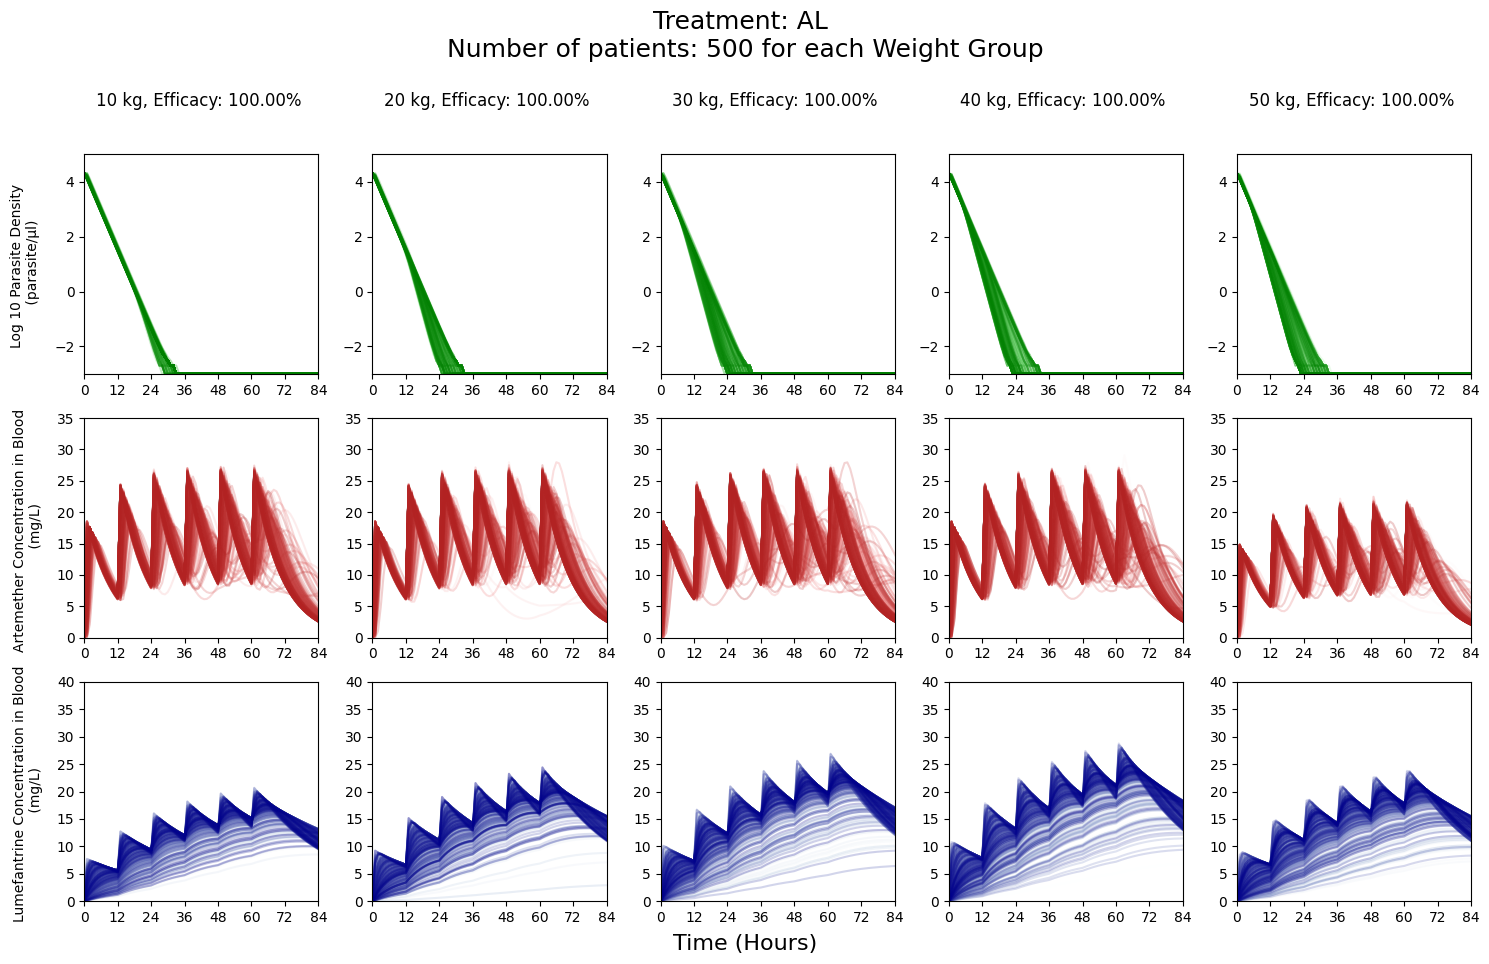

In [23]:
import math
from matplotlib.colors import LinearSegmentedColormap

if len(df_weight_compiled) >= 5:
    df_dict = {10: df_weight_compiled[0], 20: df_weight_compiled[1], 30: df_weight_compiled[2], 40: df_weight_compiled[3], 50: df_weight_compiled[4]}
else:
    print("Error: df_weight_compiled does not have enough elements.")

# Create a 4x3 subplot (3 variables, 5 weightgroups)
fig, ax = plt.subplots(3, 5, figsize=(15, 10), sharex=True, sharey=False)

# Define colormaps for each plot
green_cmap = LinearSegmentedColormap.from_list("green_cmap", ["white", "lightgreen", "green"])  # Softer green for Parasite Density
red_cmap = LinearSegmentedColormap.from_list("red_cmap", ["white", "lightcoral", "firebrick"])  # Softer red for Artemether
blue_cmap = LinearSegmentedColormap.from_list("blue_cmap", ["white", "lightsteelblue", "darkblue"])  # Softer blue for Lumefantrine

# Iterate over weight groups
for i, weight in enumerate([10, 20, 30, 40, 50]):
    df_weight = df_dict[weight]  # Get the correct dataframe
    num_pids = len(df_weight['PID'].unique())  # Number of unique PIDs
    norm = plt.Normalize(vmin=0, vmax=num_pids - 1)  # Normalize colormap

    for j, pid in enumerate(df_weight['PID'].unique()):
        df_pid = df_weight[df_weight['PID'] == pid].copy()
        df_pid['LOG10_PARASITEDENSITY'] = np.log10(df_pid['PARASITEDENSITY'] + 0.001)
        color = green_cmap(norm(j))
        ax[0, i].plot(df_pid['HOUR'], df_pid['LOG10_PARASITEDENSITY'], color=color, alpha=0.25)
        ax[0, i].set_ylim(-3, 5)  # Set y-axis limits for Parasite Density

  
    for j, pid in enumerate(df_weight['PID'].unique()):
        df_pid = df_weight[df_weight['PID'] == pid]
        color = red_cmap(norm(j))
        ax[1, i].plot(df_pid['HOUR'], df_pid['COMP2CONC_ARTEMETHER'], color=color, alpha=0.25)
        ax[1, i].set_ylim(0, 35)
        ax[2, i].set_yticks(range(0, 40, 5)) 

    # Plot Lumefantrine Concentration (Row 3) with blue colormap
    for j, pid in enumerate(df_weight['PID'].unique()):
        df_pid = df_weight[df_weight['PID'] == pid]
        color = blue_cmap(norm(j))
        ax[2, i].plot(df_pid['HOUR'], df_pid['COMP2CONC_LUM'], color=color, alpha=0.25)
        ax[2, i].set_ylim(0, 40)
        ax[2, i].set_yticks(range(0, 45, 5))  
    

    # Set x-axis limits
    for j in range(3):  # Iterate over rows (0, 1, 2)
        ax[j, i].set_xlim(0, 3*24)
        ax[j, i].set_xticks(range(0, 4*24, 12))

    # Set row labels on the top row
    ax[0, i].set_title(f'{weight} kg, Efficacy: {results_df[results_df["Weight"] == weight]["Efficacy"].values[0]:.2f}% \n ', fontsize=12, pad=20)

# Set **row titles** (only for the leftmost column)
row_titles = ["Log 10 Parasite Density \n (parasite/μl)", "Artemether Concentration in Blood \n (mg/L)", "Lumefantrine Concentration in Blood \n (mg/L)"]
for j in range(3):
    ax[j, 0].set_ylabel(row_titles[j], fontsize=10, rotation=90, labelpad=10)

# Set x-ticks for all subplots
for i in range(3):  
    for j in range(5):
        ax[i, j].tick_params(labelbottom=True)

fig.text(0.5, 0.04, 'Time (Hours)', ha='center', fontsize=16)

fig.suptitle(f"Treatment: AL \nNumber of patients: {num_pids} for each Weight Group", fontsize=18)

plt.tight_layout(rect=[0, 0.05, 1, 0.98])  # Adjust layout to fit common x-label
plt.savefig("df_weight_all_params_all_weights_log10_multicolour_lum_patient_blood_volume_02_72h.png")
plt.show()


In [59]:
pk_params_dfs_artemether = []

for i in range(1, 6):
    pk_params = pd.read_csv(f"PK_parameters_{i}0kg_artemether.txt", sep=",", header=0)
    pk_params_dfs_artemether.append(pk_params)

In [60]:
pk_params_dfs_lumefantrine = []

for i in range(1, 6):
    pk_params = pd.read_csv(f"PK_parameters_{i}0kg_lumefantrine.txt", sep=",", header=0)
    pk_params_dfs_lumefantrine.append(pk_params)

In [61]:
for i in range(0, 5):
    pk_params_dfs_artemether[i].columns = pk_params_dfs_artemether[i].columns.str.replace(' ', '')
    pk_params_dfs_artemether[i].columns = pk_params_dfs_artemether[i].columns.str.replace('/', '_')

    pk_params_dfs_lumefantrine[i].columns = pk_params_dfs_lumefantrine[i].columns.str.replace(' ', '')
    pk_params_dfs_lumefantrine[i].columns = pk_params_dfs_lumefantrine[i].columns.str.replace('/', '_')

In [62]:
pk_params_dfs_lumefantrine[0].columns

Index(['PID', 'i_lum_F1_indiv', 'i_lum_k12(KA)', 'i_lum_k23(Q_V)',
       'i_lum_k32(Q_VP)', 'i_lum_k20(CL_V)', 'total_mg_dose_per_occassion',
       'DS', 'Q', 'V', 'CL', 'VP'],
      dtype='object')

In [63]:
pk_params_dfs_artemether[0].columns

Index(['PID', 'i_artemether_F1_indiv', 'i_artemether_KTR',
       'total_mg_dose_per_occassion', 'TVCL', 'CL', 'TVV2', 'V2',
       'i_artemether_k20(CL_V2)'],
      dtype='object')

In [64]:
artemether_v2_mean = []
artemether_v2_min = []
artemether_v2_max = []
artemether_v2_median = []

for i in range(5):
    artemether_v2_median.append(pk_params_dfs_artemether[i]['V2'].median())
    artemether_v2_mean.append(pk_params_dfs_artemether[i]['V2'].mean())
    artemether_v2_min.append(pk_params_dfs_artemether[i]['V2'].min())
    artemether_v2_max.append(pk_params_dfs_artemether[i]['V2'].max())

print("Artemether V2 Median: ", artemether_v2_median)
print("Artemether V2 Mean: ", artemether_v2_mean)
print("Artemether V2 Min: ", artemether_v2_min)
print("Artemether V2 Max: ", artemether_v2_max)

Artemether V2 Median:  [np.float64(26.5728), np.float64(53.293000000000006), np.float64(79.72245), np.float64(106.45599999999999), np.float64(132.7775)]
Artemether V2 Mean:  [np.float64(26.824837579999997), np.float64(53.618069039999995), np.float64(80.38000622), np.float64(107.20286443999998), np.float64(133.85330202)]
Artemether V2 Min:  [np.float64(17.1407), np.float64(32.2736), np.float64(48.9948), np.float64(66.847), np.float64(85.451)]
Artemether V2 Max:  [np.float64(39.2346), np.float64(82.2403), np.float64(127.638), np.float64(176.293), np.float64(210.321)]


In [65]:
artemether_k20_mean = []
lumefantrine_k23_mean = []
lumefantrine_k20_mean = []
for i in range(5):
    artemether_k20_mean.append(pk_params_dfs_artemether[i]["i_artemether_k20(CL_V2)"].mean())
    lumefantrine_k23_mean.append(pk_params_dfs_lumefantrine[i]["i_lum_k23(Q_V)"].mean())
    lumefantrine_k20_mean.append(pk_params_dfs_lumefantrine[i]["i_lum_k20(CL_V)"].mean())

artemether_k20_min = []
lumefantrine_k23_min = []
lumefantrine_k20_min = []
for i in range(5):
    artemether_k20_min.append(pk_params_dfs_artemether[i]["i_artemether_k20(CL_V2)"].min())
    lumefantrine_k23_min.append(pk_params_dfs_lumefantrine[i]["i_lum_k23(Q_V)"].min())
    lumefantrine_k20_min.append(pk_params_dfs_lumefantrine[i]["i_lum_k20(CL_V)"].min())

artemether_k20_max = []
lumefantrine_k23_max = []
lumefantrine_k20_max = []
for i in range(5):
    artemether_k20_max.append(pk_params_dfs_artemether[i]["i_artemether_k20(CL_V2)"].max())
    lumefantrine_k23_max.append(pk_params_dfs_lumefantrine[i]["i_lum_k23(Q_V)"].max())
    lumefantrine_k20_max.append(pk_params_dfs_lumefantrine[i]["i_lum_k20(CL_V)"].max())

artemether_k20_median = []
lumefantrine_k23_median = []
lumefantrine_k20_median = []

for i in range(5):
    artemether_k20_median.append(pk_params_dfs_artemether[i]["i_artemether_k20(CL_V2)"].median())
    lumefantrine_k23_median.append(pk_params_dfs_lumefantrine[i]["i_lum_k23(Q_V)"].median())
    lumefantrine_k20_median.append(pk_params_dfs_lumefantrine[i]["i_lum_k20(CL_V)"].median())   



In [66]:
lumefantrine_k32_mean = []
lumefantrine_k32_min = []
lumefantrine_k32_max = []
lumefantrine_k32_median = []

for i in range(0, 5):
    lumefantrine_k32_mean.append(pk_params_dfs_lumefantrine[i]["i_lum_k32(Q_VP)"].mean())
    lumefantrine_k32_min.append(pk_params_dfs_lumefantrine[i]["i_lum_k32(Q_VP)"].min())
    lumefantrine_k32_max.append(pk_params_dfs_lumefantrine[i]["i_lum_k32(Q_VP)"].max())
    lumefantrine_k32_median.append(pk_params_dfs_lumefantrine[i]["i_lum_k32(Q_VP)"].median())

print("Lumefantrine k32 mean values: ", lumefantrine_k32_mean)
print("Lumefantrine k32 min values: ", lumefantrine_k32_min)
print("Lumefantrine k32 max values: ", lumefantrine_k32_max)
print("Lumefantrine k32 median values: ", lumefantrine_k32_median)

Lumefantrine k32 mean values:  [np.float64(0.005830509999999998), np.float64(0.005830509999999998), np.float64(0.005830509999999998), np.float64(0.005830509999999998), np.float64(0.005830509999999998)]
Lumefantrine k32 min values:  [np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051)]
Lumefantrine k32 max values:  [np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051)]
Lumefantrine k32 median values:  [np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051), np.float64(0.00583051)]


In [67]:
for i in range(0, 5):
    print(f"\n\n\n\nArtemether k20 mean for weight {i+1}0kg: {artemether_k20_mean[i]}")
    print(f"Artemether k20 min for weight {i+1}0kg: {artemether_k20_min[i]}")
    print(f"Artemether k20 max for weight {i+1}0kg: {artemether_k20_max[i]}")
    print(f"Artemether k20 median for weight {i+1}0kg: {artemether_k20_median[i]}\n")


    print(f"\nLumefantrine k23 mean for weight {i+1}0kg: {lumefantrine_k23_mean[i]}")
    print(f"Lumefantrine k23 min for weight {i+1}0kg: {lumefantrine_k23_min[i]}")
    print(f"Lumefantrine k23 max for weight {i+1}0kg: {lumefantrine_k23_max[i]}")
    print(f"Lumefantrine k23 median for weight {i+1}0kg: {lumefantrine_k23_median[i]}\n")


    print(f"\nLumefantrine k20 mean for weight {i+1}0kg: {lumefantrine_k20_mean[i]}")
    print(f"Lumefantrine k20 min for weight {i+1}0kg: {lumefantrine_k20_min[i]}")
    print(f"Lumefantrine k20 max for weight {i+1}0kg: {lumefantrine_k20_max[i]}")
    print(f"Lumefantrine k20 median for weight {i+1}0kg: {lumefantrine_k20_median[i]}\n")





Artemether k20 mean for weight 10kg: 0.6092713606
Artemether k20 min for weight 10kg: 0.409905
Artemether k20 max for weight 10kg: 0.938262
Artemether k20 median for weight 10kg: 0.6052225


Lumefantrine k23 mean for weight 10kg: 0.0525954379982
Lumefantrine k23 min for weight 10kg: 0.00065258
Lumefantrine k23 max for weight 10kg: 1.38234
Lumefantrine k23 median for weight 10kg: 0.03014915


Lumefantrine k20 mean for weight 10kg: 0.206406527642
Lumefantrine k20 min for weight 10kg: 0.002561
Lumefantrine k20 max for weight 10kg: 5.42488
Lumefantrine k20 median for weight 10kg: 0.118318





Artemether k20 mean for weight 20kg: 0.609971506
Artemether k20 min for weight 20kg: 0.391109
Artemether k20 max for weight 20kg: 0.996632
Artemether k20 median for weight 20kg: 0.603549


Lumefantrine k23 mean for weight 20kg: 0.05684698790279999
Lumefantrine k23 min for weight 20kg: 0.000479621
Lumefantrine k23 max for weight 20kg: 1.61567
Lumefantrine k23 median for weight 20kg: 0.03077455


L

In [68]:
pk_params_dfs_artemether[0].columns

Index(['PID', 'i_artemether_F1_indiv', 'i_artemether_KTR',
       'total_mg_dose_per_occassion', 'TVCL', 'CL', 'TVV2', 'V2',
       'i_artemether_k20(CL_V2)'],
      dtype='object')

/tmp/ipykernel_24077/3543256120.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


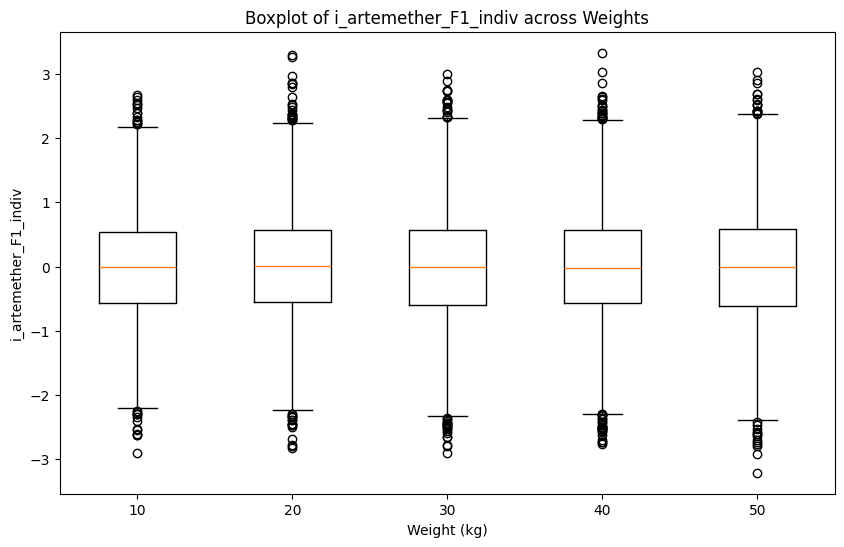

In [69]:
data_for_boxplot = [pk_params_dfs_artemether[i]["i_artemether_F1_indiv"] for i in range(len(pk_params_dfs_artemether))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('i_artemether_F1_indiv')
plt.title('Boxplot of i_artemether_F1_indiv across Weights')

plt.show()


/tmp/ipykernel_24077/3631346500.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


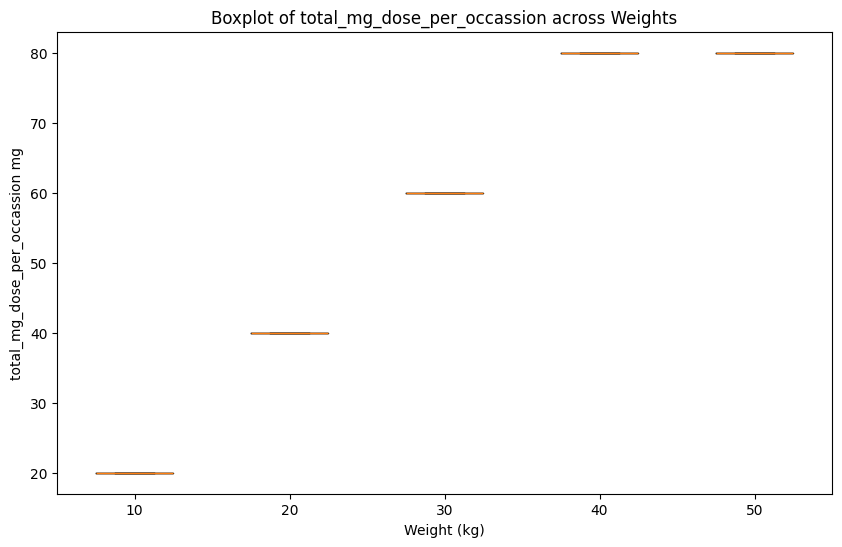

In [70]:
data_for_boxplot = [pk_params_dfs_artemether[i]["total_mg_dose_per_occassion"] for i in range(len(pk_params_dfs_artemether))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('total_mg_dose_per_occassion mg')
plt.title('Boxplot of total_mg_dose_per_occassion across Weights')

plt.show()


/tmp/ipykernel_24077/2309825299.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


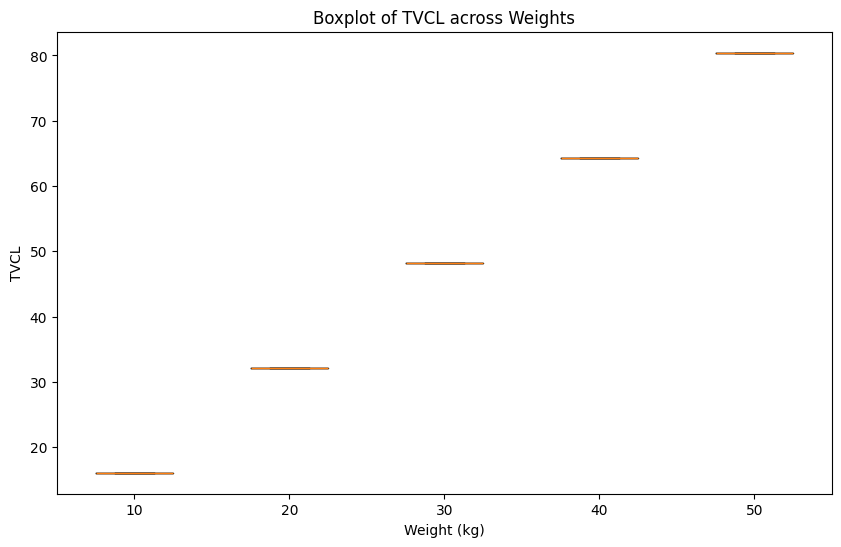

In [71]:
data_for_boxplot = [pk_params_dfs_artemether[i]["TVCL"] for i in range(len(pk_params_dfs_artemether))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('TVCL')
plt.title('Boxplot of TVCL across Weights')

plt.savefig("TVCL_boxplot_artemether_01.png")
plt.show()


/tmp/ipykernel_24077/905276580.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


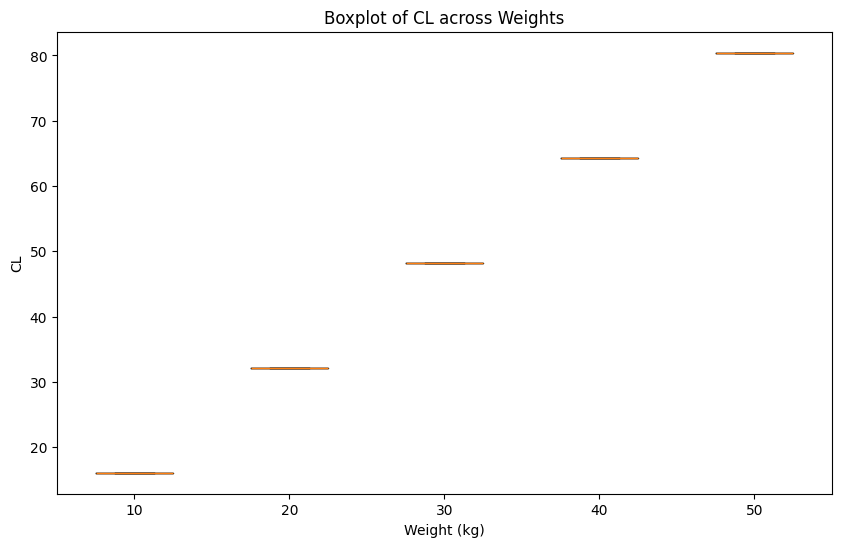

In [72]:
data_for_boxplot = [pk_params_dfs_artemether[i]["CL"] for i in range(len(pk_params_dfs_artemether))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('CL')
plt.title('Boxplot of CL across Weights')

plt.savefig("CL_boxplot_artemether_01.png")
plt.show()


/tmp/ipykernel_24077/2126833572.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


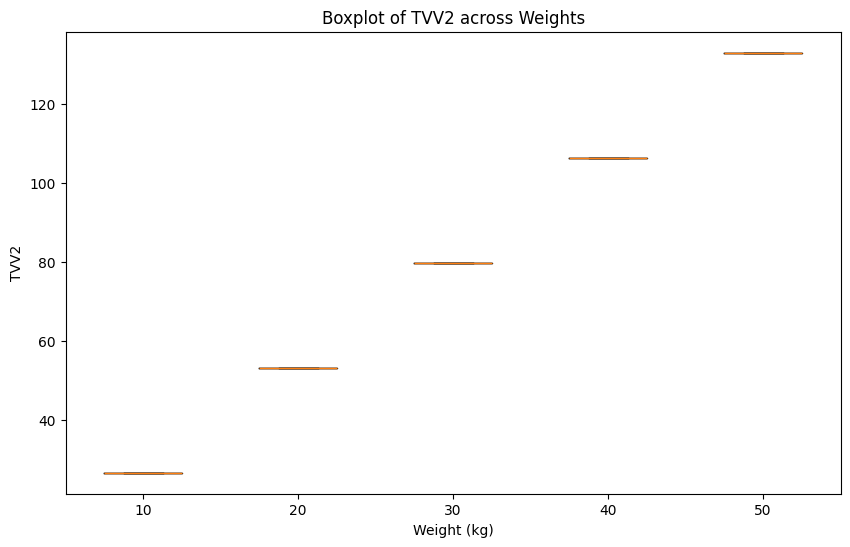

In [73]:
data_for_boxplot = [pk_params_dfs_artemether[i]["TVV2"] for i in range(len(pk_params_dfs_artemether))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('TVV2')
plt.title('Boxplot of TVV2 across Weights')

plt.savefig("TVV2_boxplot_artemether_01.png")
plt.show()


/tmp/ipykernel_24077/2390609497.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


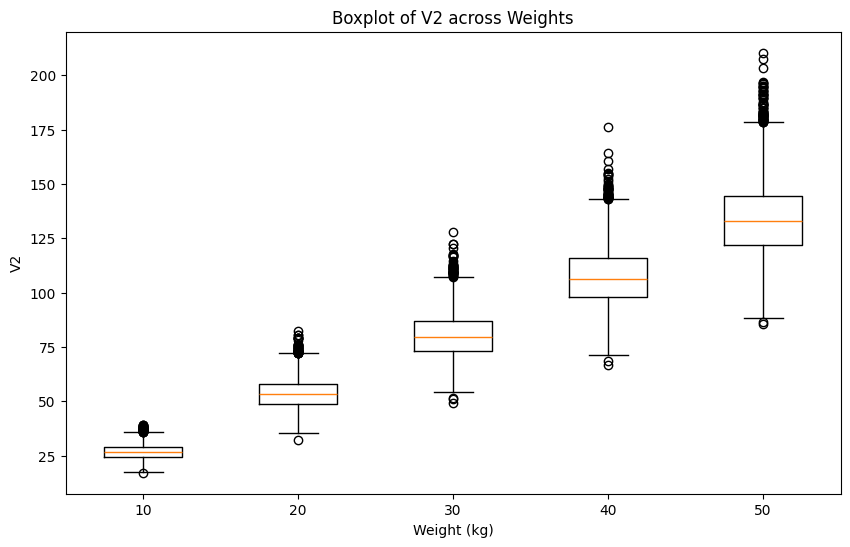

In [74]:
data_for_boxplot = [pk_params_dfs_artemether[i]["V2"] for i in range(len(pk_params_dfs_artemether))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('V2')
plt.title('Boxplot of V2 across Weights')

plt.savefig("V2_boxplot_artemether_01.png")
plt.show()


In [29]:
pk_params_dfs_artemether[0].columns

Index(['PID', 'i_artemether_F1_indiv', 'i_artemether_KTR',
       'total_mg_dose_per_occassion', 'TVCL', 'CL', 'TVV2', 'V2',
       'i_artemether_k20(CL_V2)'],
      dtype='object')

/tmp/ipykernel_24077/1075147497.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


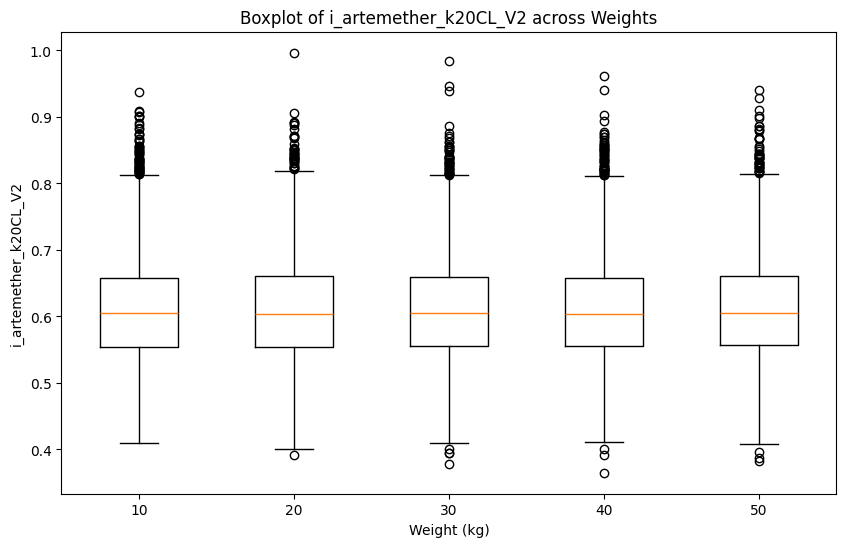

In [75]:
data_for_boxplot = [pk_params_dfs_artemether[i]["i_artemether_k20(CL_V2)"] for i in range(len(pk_params_dfs_artemether))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('i_artemether_k20CL_V2')
plt.title('Boxplot of i_artemether_k20CL_V2 across Weights')

plt.savefig("i_artemether_k20CL_V2_boxplot_artemether_01.png")
plt.show()


In [31]:
pk_params_dfs_lumefantrine[0].columns

Index(['PID', 'i_lum_F1_indiv', 'i_lum_k12(KA)', 'i_lum_k23(Q_V)',
       'i_lum_k32(Q_VP)', 'i_lum_k20(CL_V)', 'total_mg_dose_per_occassion',
       'DS', 'Q', 'V', 'CL', 'VP'],
      dtype='object')

/tmp/ipykernel_24077/1726105695.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


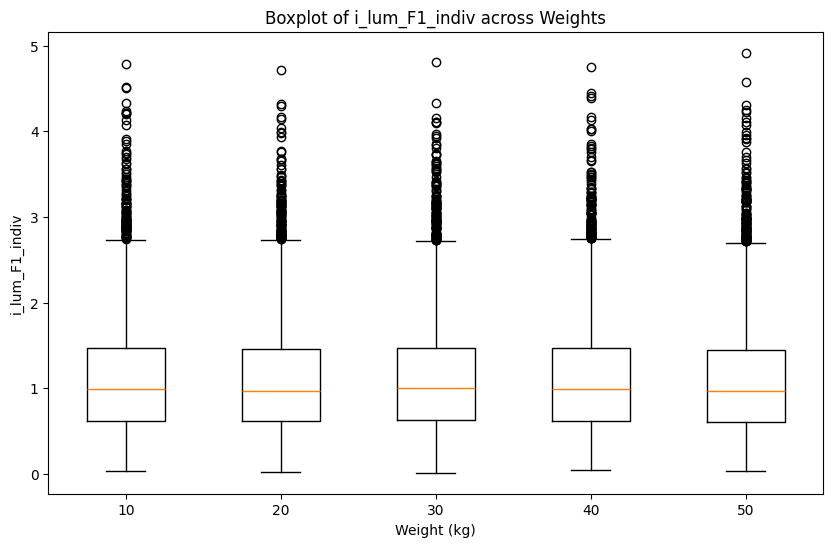

In [76]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["i_lum_F1_indiv"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('i_lum_F1_indiv')
plt.title('Boxplot of i_lum_F1_indiv across Weights')

plt.savefig("i_lum_F1_indiv_boxplot_lumefantrine_01.png")
plt.show()


/tmp/ipykernel_24077/1471703608.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


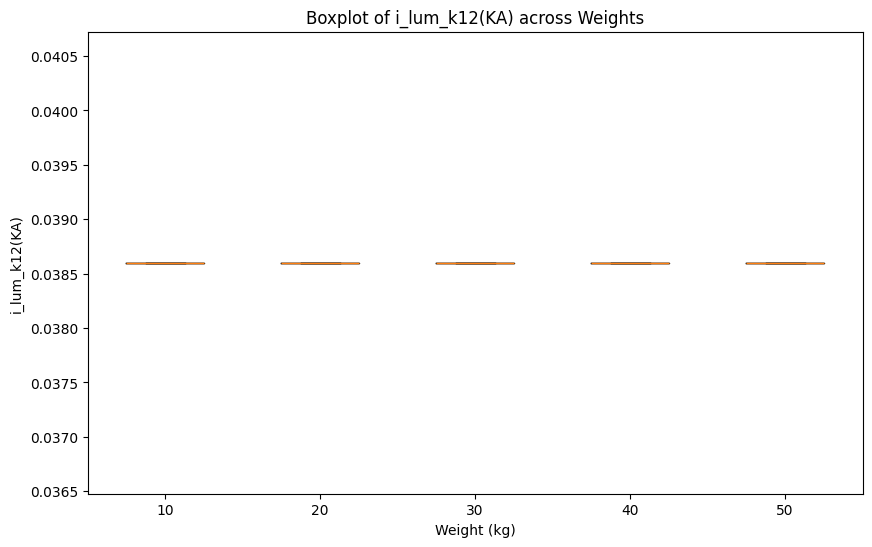

In [77]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["i_lum_k12(KA)"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('i_lum_k12(KA)')
plt.title('Boxplot of i_lum_k12(KA) across Weights')

plt.savefig("i_lum_k12(KA)_boxplot_lumefantrine_01.png")
plt.show()


/tmp/ipykernel_24077/2594267847.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


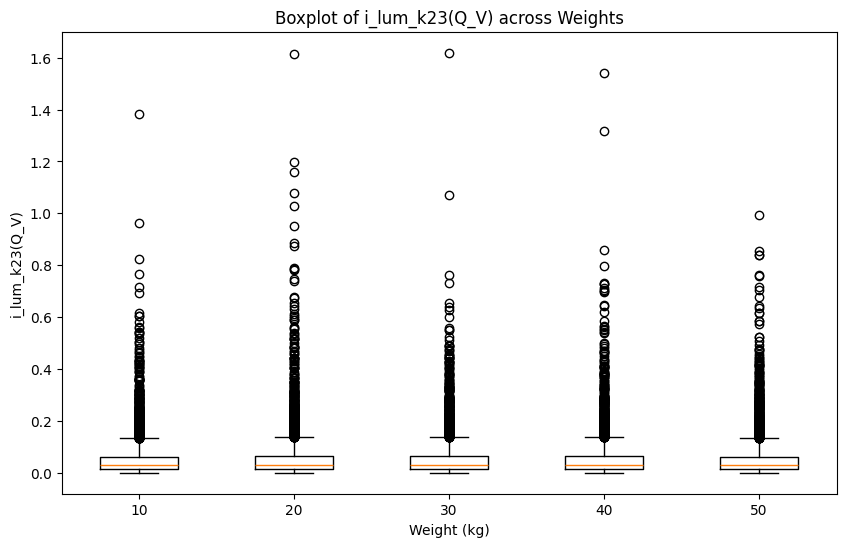

In [78]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["i_lum_k23(Q_V)"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('i_lum_k23(Q_V)')
plt.title('Boxplot of i_lum_k23(Q_V) across Weights')

plt.savefig("i_lum_k23(Q_V)_boxplot_lumefantrine_01.png")
plt.show()


/tmp/ipykernel_24077/3590812113.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


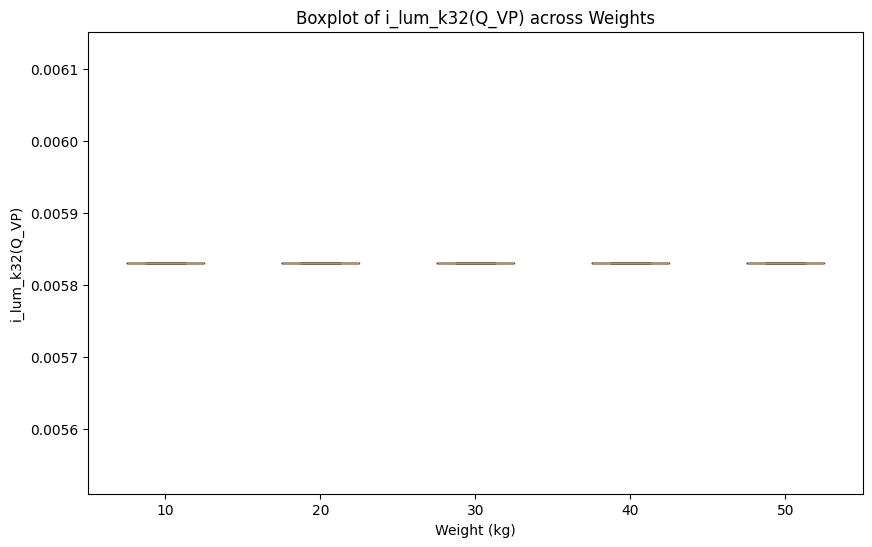

In [79]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["i_lum_k32(Q_VP)"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('i_lum_k32(Q_VP)')
plt.title('Boxplot of i_lum_k32(Q_VP) across Weights')

plt.savefig("i_lum_k32(Q_VP)_boxplot_lumefantrine_01.png")
plt.show()


/tmp/ipykernel_24077/3259185610.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


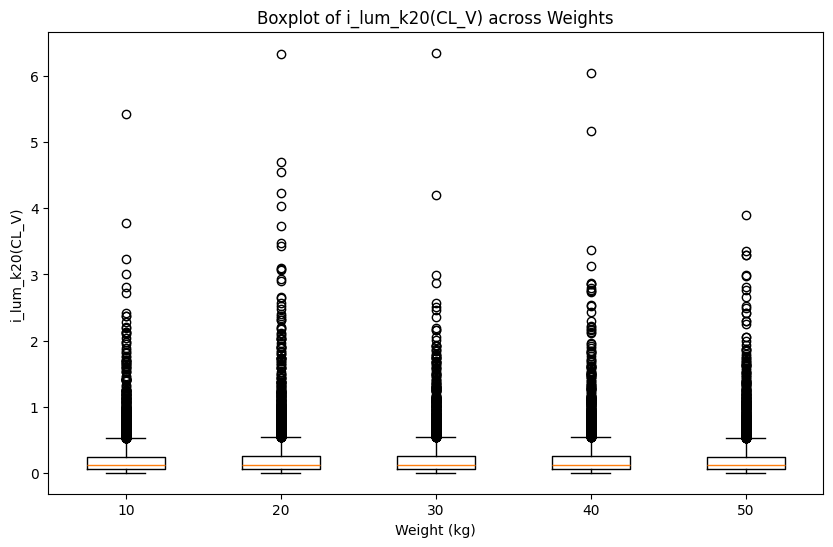

In [80]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["i_lum_k20(CL_V)"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('i_lum_k20(CL_V)')
plt.title('Boxplot of i_lum_k20(CL_V) across Weights')

plt.savefig("i_lum_k20(CL_V)_boxplot_lumefantrine_01.png")
plt.show()


/tmp/ipykernel_24077/425834703.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


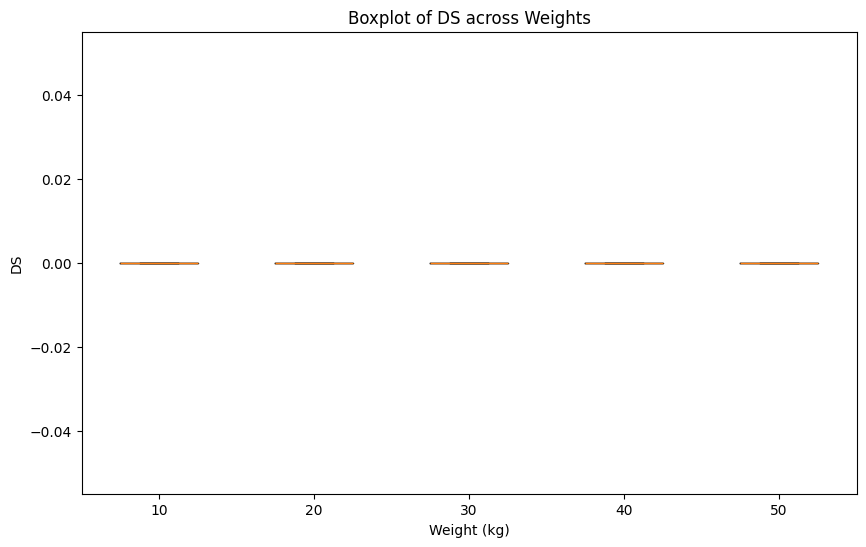

In [81]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["DS"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('DS')
plt.title('Boxplot of DS across Weights')

plt.savefig("DS_boxplot_lumefantrine_01.png")
plt.show()


In [38]:
pk_params_dfs_lumefantrine[0].columns

Index(['PID', 'i_lum_F1_indiv', 'i_lum_k12(KA)', 'i_lum_k23(Q_V)',
       'i_lum_k32(Q_VP)', 'i_lum_k20(CL_V)', 'total_mg_dose_per_occassion',
       'DS', 'Q', 'V', 'CL', 'VP'],
      dtype='object')

/tmp/ipykernel_24077/2742218971.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


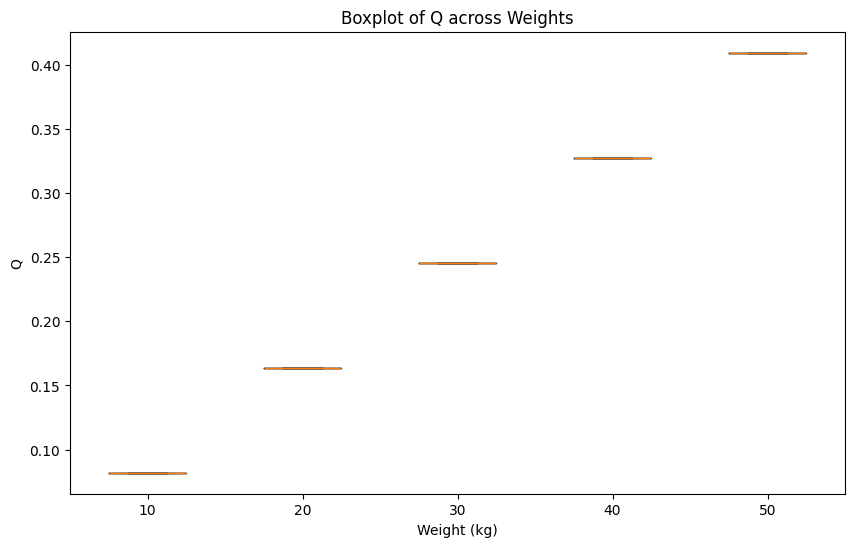

In [82]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["Q"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('Q')
plt.title('Boxplot of Q across Weights')

plt.savefig("Q_boxplot_lumefantrine_01.png")
plt.show()


/tmp/ipykernel_24077/639271178.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


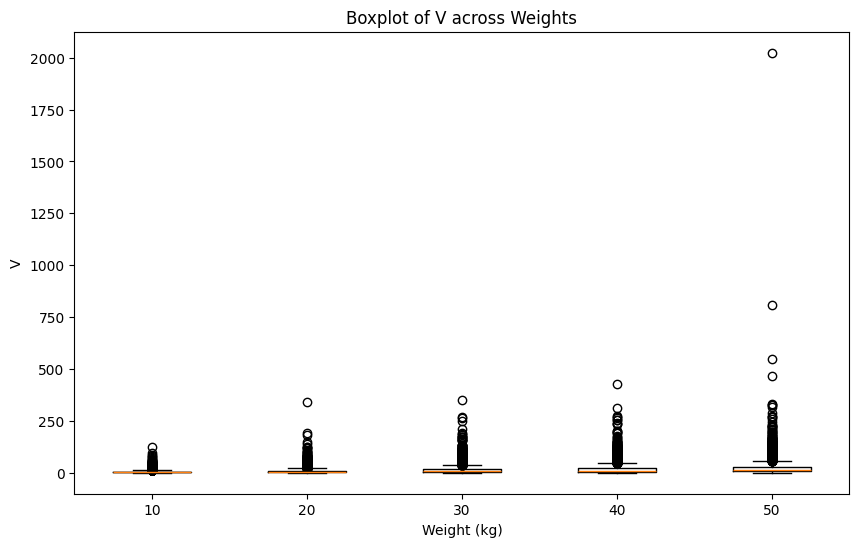

In [83]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["V"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('V')
plt.title('Boxplot of V across Weights')

plt.savefig("V_boxplot_lumefantrine_01.png")
plt.show()


/tmp/ipykernel_24077/1178805296.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


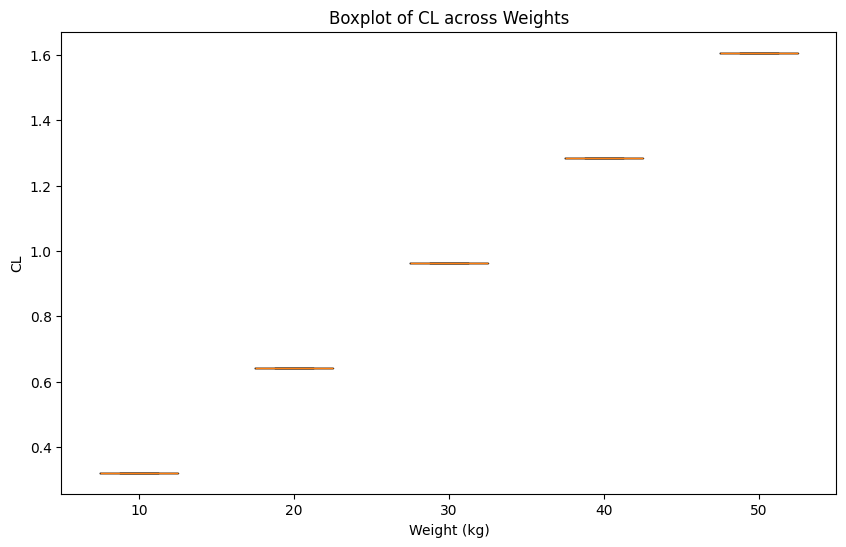

In [84]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["CL"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('CL')
plt.title('Boxplot of CL across Weights')

plt.savefig("CL_boxplot_lumefantrine_01.png")
plt.show()


In [41]:
pk_params_dfs_lumefantrine[0].columns

Index(['PID', 'i_lum_F1_indiv', 'i_lum_k12(KA)', 'i_lum_k23(Q_V)',
       'i_lum_k32(Q_VP)', 'i_lum_k20(CL_V)', 'total_mg_dose_per_occassion',
       'DS', 'Q', 'V', 'CL', 'VP'],
      dtype='object')

/tmp/ipykernel_24077/1284534399.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=weight_labels)


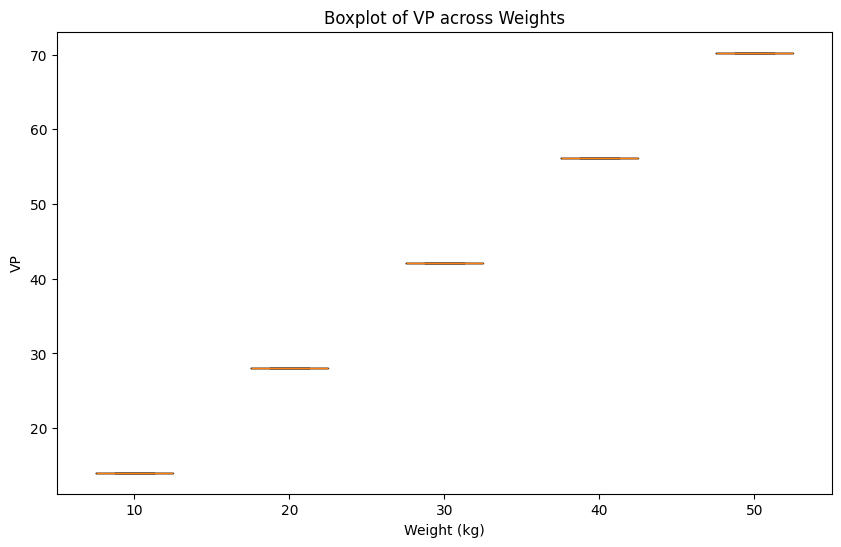

In [85]:
data_for_boxplot = [pk_params_dfs_lumefantrine[i]["VP"] for i in range(len(pk_params_dfs_lumefantrine))]

# Define the weight labels
weight_labels = [10, 20, 30, 40, 50]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=weight_labels)

# Label the plot
plt.xlabel('Weight (kg)')
plt.ylabel('VP')
plt.title('Boxplot of VP across Weights')

plt.savefig("VP_boxplot_lumefantrine_01.png")
plt.show()


In [ ]:
pow( log10( parasites_per_ul_at_first_lum_dose ) / 4.20 , THETA9 )

In [86]:
THETA9 = -0.643

In [87]:
parasites_per_ul_at_first_lum_dose = 20000

In [88]:
import math

In [98]:
math.log10(parasites_per_ul_at_first_lum_dose)/4.20

1.0240547608723765

In [99]:
1.0240547608723765 ** THETA9

0.9848320975568793

In [91]:
BXPAR = -0.343; # parameter from box-cox transformation
PHI = math.exp(0)

In [92]:
ETATR = ((PHI**BXPAR) - 1.0) / BXPAR

In [93]:
ETATR

-0.0

In [95]:
PHI**BXPAR

1.0

In [96]:
math.exp(0)

1.0

0.3913928619412965

In [100]:
0.9848320975568793 * 1

0.9848320975568793

In [102]:
THETA7 = 3.86

In [104]:
D50 = THETA7

for weight in [10, 20, 30, 40, 50]:
    if weight < 15:
        total_mg_dose_per_occassion = 1*120
    elif weight < 25:
        total_mg_dose_per_occassion = 2*120
    elif weight < 35:
        total_mg_dose_per_occassion = 3*120
    else:
        total_mg_dose_per_occassion = 4*120
    
    DS = 1.0 - ( total_mg_dose_per_occassion/weight ) / ( ( total_mg_dose_per_occassion/weight ) + D50  )
    print(f"Weight: {weight} kg, Total mg dose per occasion: {total_mg_dose_per_occassion}, DS: {DS}")

    THETA9 = -0.643
    parasites_per_ul_at_first_lum_dose = 20000
    PARASITE = (math.log10(parasites_per_ul_at_first_lum_dose)/4.20) ** THETA9
    THETA6 = 1.0
    TVF1 = THETA6 * DS * PARASITE
    print(f"Weight: {weight} kg, TVF1: {TVF1}")


    

Weight: 10 kg, Total mg dose per occasion: 120, DS: 0.2433795712484237
Weight: 10 kg, TVF1: 0.23968801365507905
Weight: 20 kg, Total mg dose per occasion: 240, DS: 0.2433795712484237
Weight: 20 kg, TVF1: 0.23968801365507905
Weight: 30 kg, Total mg dose per occasion: 360, DS: 0.2433795712484237
Weight: 30 kg, TVF1: 0.23968801365507905
Weight: 40 kg, Total mg dose per occasion: 480, DS: 0.2433795712484237
Weight: 40 kg, TVF1: 0.23968801365507905
Weight: 50 kg, Total mg dose per occasion: 480, DS: 0.2867756315007429
Weight: 50 kg, TVF1: 0.28242584669907533


In [105]:
print(PARASITE)

0.9848320975568793


In [106]:
0.9848320975568793 * 0.2433795712484237

0.23968801365507905

In [107]:
0.2867756315007429 * 0.9848320975568793

0.28242584669907533

In [109]:
(120/10)  / (120/10 + 3.86)

0.7566204287515763

In [110]:
(120/10)  / (120/10)

1.0

In [111]:
THETA6 * 1 * PARASITE

0.9848320975568793

In [112]:
THETA6 * PARASITE

0.9848320975568793

In [113]:
PARASITE

0.9848320975568793

In [114]:
10/42

0.23809523809523808

In [115]:
20/42

0.47619047619047616

In [118]:
11.2 * (10/42)

2.6666666666666665

In [122]:
for weight in [10, 20, 30, 40, 50]:
    print(1.2 * (weight/42))

0.2857142857142857
0.5714285714285714
0.8571428571428571
1.1428571428571428
1.4285714285714286


In [121]:
for weight in [10, 20, 30, 40, 50]:
    print(11.2 * (weight))

112.0
224.0
336.0
448.0
560.0
